In [354]:
from scipy.ndimage.filters import convolve

In [359]:
%run netCDF_Processing.py

In [232]:
cdf = CDFData(hgt_path = "E:\hgt.2012.nc",
              uwind_path = r"E:\uwnd.2012.nc",
              vwind_path = r"E:\vwnd.2012.nc")

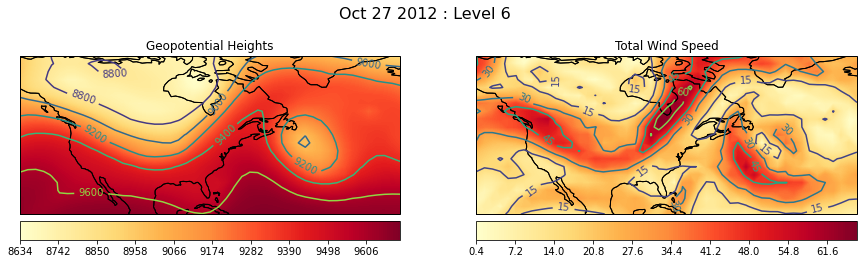

In [233]:
cdf.plot('all',(10,27),6,figsize=(15,4))
plt.show()

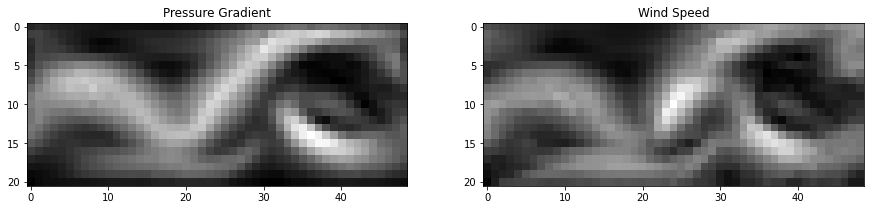

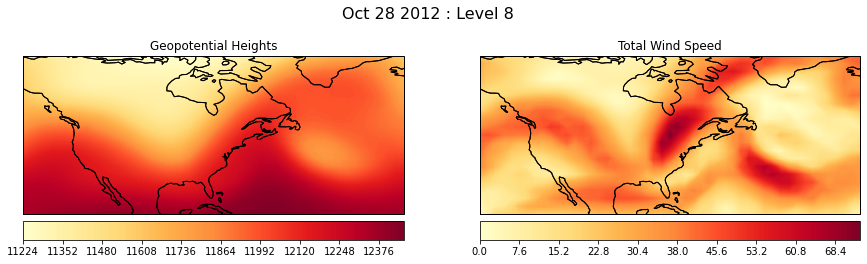

In [439]:
day = cdf.date_to_day((10,28))
level = 8
winds = cdf.loc_winds[day-1,level-1,...]
hgts = cdf.loc_hgts[day-1,level-1,...]

x_grad_kernel = np.array([[-1,0,1]])
y_grad_kernel = x_grad_kernel.reshape(-1,1)

x_grad = convolve(hgts,x_grad_kernel)
y_grad = convolve(hgts,y_grad_kernel)

grad = np.sqrt(np.square(x_grad) + np.square(y_grad))

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(grad,cmap='gist_gray')
ax[0].set_title('Pressure Gradient')
ax[1].imshow(winds,cmap='gist_gray')
ax[1].set_title('Wind Speed')
cdf.plot('all',day,level, contours=0)
plt.show()

([], <a list of 0 Text major ticklabel objects>)

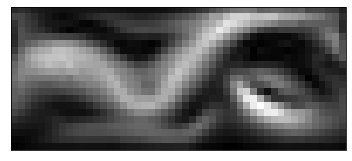

In [387]:
plt.imshow(grad,cmap='gist_gray')
plt.xticks([])
plt.yticks([])

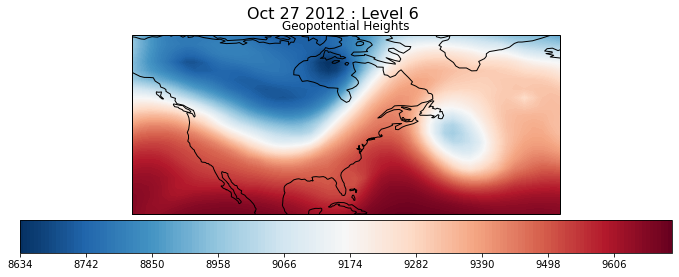

In [177]:
levels = 20
cmap = 'RdBu_r'
fig, ax = cdf.plot('hgts',(10,27),6, contours=0, cmap=cmap)

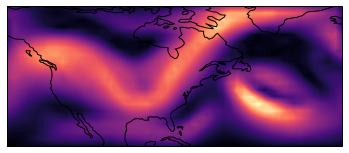

In [189]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.contourf(cdf.loc_lons, cdf.loc_lats,grad,cmap='magma', levels=100)

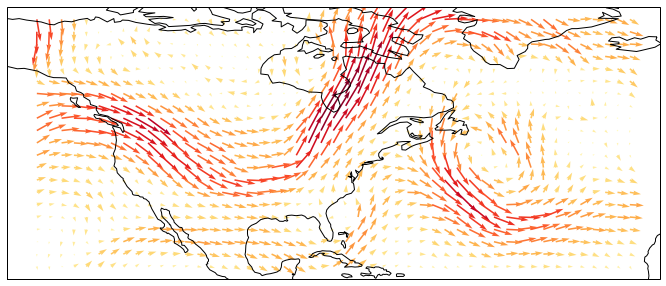

In [241]:
fig, ax = cdf.quiver((10,27),6)

In [196]:
data = CDFData(hgt_path = "E:\hgt.2012.nc",
              uwind_path = r"E:\uwnd.2012.nc",
              vwind_path = r"E:\vwnd.2012.nc")

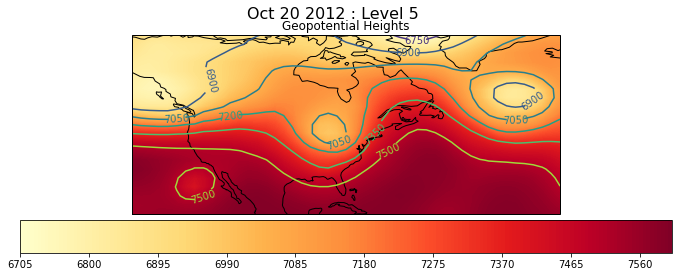

In [198]:
fig, ax = data.plot('hgts',(10,20),5)

# Masking

In [327]:
from skimage.io import imread
from skimage.transform import resize

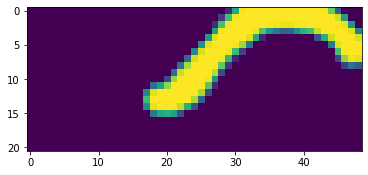

In [448]:
mask_img = imread(r"C:\Users\Administrator\Downloads\arc_mask_30px.png", as_gray=True)
mask_img = resize(mask_img,hgts.shape)
mask_img[mask_img < mask_img.max()/10] = 0
plt.imshow(mask_img)

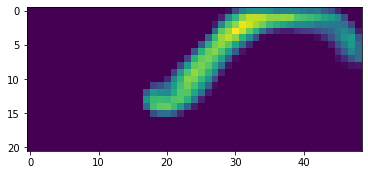

In [409]:
masked_grad = mask_img*normalize(grad)
plt.imshow(masked_grad)

In [436]:
masked_grad.sum()/mask_img.sum()

0.5321882995450702

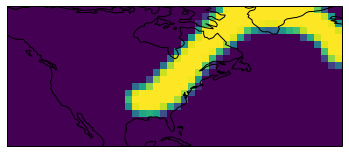

In [411]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection':ccrs.PlateCarree()})
ax.pcolor(cdf.loc_lons, cdf.loc_lats,mask_img)
ax.coastlines()

In [435]:
def get_score(hgts):
    grad = gradient(hgts)
    masked_grad = mask_img*normalize(grad)
    score = masked_grad.sum()/mask_img.sum()
    return score

In [444]:
scores = np.zeros(cdf.hgts.shape[0])
days = np.arange(cdf.hgts.shape[0])
level = 8

for day in days:
    hgts = cdf.loc_hgts[day-1,level-1,...]
    scores[day] = get_score(hgts)

arg_scores = np.argsort(scores)

(<Figure size 1080x288 with 4 Axes>,
 array([<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x00000215E2618F48>,
       dtype=object))

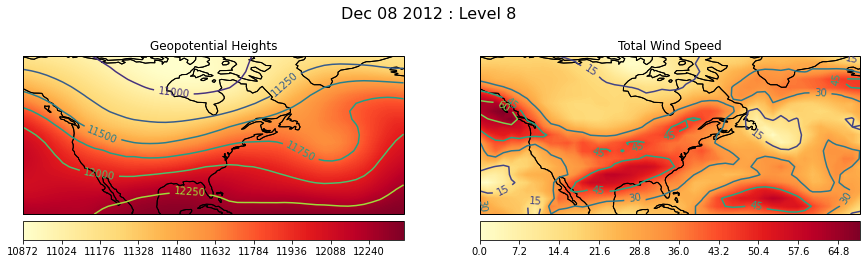

In [446]:
cdf.plot('all',int(arg_scores[-2]),level)

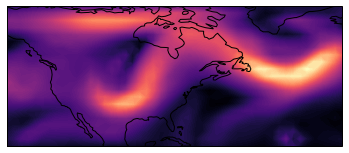

In [419]:
cur_day = cdf.date_to_day((11,12))
cur_hgts = cdf.loc_hgts[cur_day-1,6-1,...]
cur_grad = gradient(cur_hgts)

fig, ax = plt.subplots(1,1, subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.contourf(cdf.loc_lons, cdf.loc_lats,cur_grad,cmap='magma', levels=100)

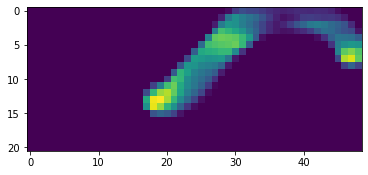

In [421]:
plt.imshow(mask_img*normalize(cur_grad))